<a href="https://colab.research.google.com/github/anjusree123/TensorFlow/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax,Conv2D,MaxPooling2D

In [ ]:
mnist_data=tf.keras.datasets.fashion_mnist
(train_image,train_labels),(test_images,test_labels)=mnist_data.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_image.shape

(60000, 28, 28)

In [ ]:
labels=['T-shirt/top',
      'Trouser',
      'Pullover',
      'Dress',
      'Coat',
      'Sandal',
      'Shirt',
      'Sneaker',
      'Bag',
      'Ankle Boot']
print(train_labels[0])

9


In [ ]:
train_image=train_image/255.
test_images=test_images/255.

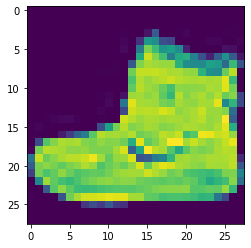

TypeError: ignored

In [ ]:
i=0
img=train_image[i,:,:]
plt.imshow(img)
plt.show()
print({labels[train_image[i]]})

In [ ]:
model= Sequential([
    Conv2D(16,(3,3),padding='SAME',strides=2, activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(10,activation='softmax')
])

In [ ]:
opt=tf.keras.optimizers.Adam(learning_rate=0.005)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy','mae'])

NameError: ignored

In [ ]:
history=model.fit(train_image[...,np.newaxis],train_labels,epochs=8,batch_size=256)

Epoch 1/8
235/235 [==============================] - 5s 20ms/step - loss: 0.3559 - accuracy: 0.8704 - mae: 4.4200
Epoch 2/8
235/235 [==============================] - 5s 20ms/step - loss: 0.3519 - accuracy: 0.8712 - mae: 4.4200
Epoch 3/8
235/235 [==============================] - 5s 20ms/step - loss: 0.3490 - accuracy: 0.8719 - mae: 4.4200
Epoch 4/8
235/235 [==============================] - 5s 20ms/step - loss: 0.3490 - accuracy: 0.8725 - mae: 4.4200
Epoch 5/8
235/235 [==============================] - 5s 20ms/step - loss: 0.3452 - accuracy: 0.8742 - mae: 4.4200
Epoch 6/8
235/235 [==============================] - 5s 20ms/step - loss: 0.3412 - accuracy: 0.8748 - mae: 4.4200
Epoch 7/8
235/235 [==============================] - 5s 20ms/step - loss: 0.3402 - accuracy: 0.8759 - mae: 4.4200
Epoch 8/8
235/235 [==============================] - 5s 20ms/step - loss: 0.3398 - accuracy: 0.8749 - mae: 4.4200


In [ ]:
df=pd.DataFrame(history.history)
df.head()

,loss,accuracy,mae
0,0.398653,0.855933,4.420002
1,0.388387,0.858317,4.420000
2,0.384460,0.861300,4.419999
3,0.377208,0.862983,4.420001
4,0.368368,0.866367,4.420000


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

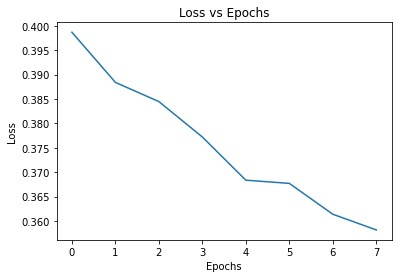

In [ ]:
loss_plot=df.plot(y="loss", title="Loss vs Epochs", legend=False)
loss_plot.set(xlabel="Epochs", ylabel="Loss")

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epochs')]

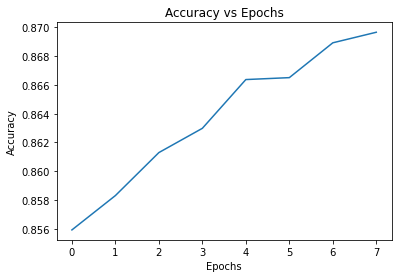

In [ ]:
acc_plot=df.plot(y="accuracy", title="Accuracy vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")

[Text(0, 0.5, 'mae'), Text(0.5, 0, 'epochs')]

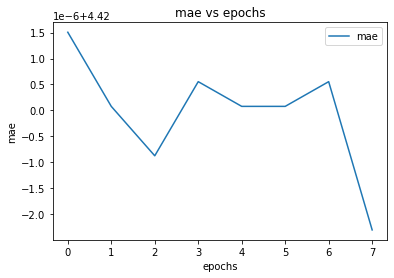

In [ ]:
mae_plot=df.plot(y="mae", title="mae vs epochs", legend="False")
mae_plot.set(xlabel="epochs",ylabel="mae")

In [ ]:
model.evaluate(test_images[...,np.newaxis],test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3894 - accuracy: 0.8552 - mae: 4.4200


[0.3893766701221466, 0.8551999926567078, 4.419997215270996]

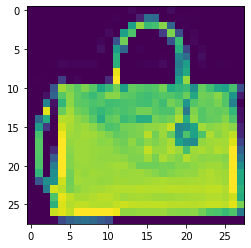

In [ ]:
#random_indx=np.random.choice(test_images.shape[0])
test_image=test_images[30]
plt.imshow(test_image)
plt.show()

In [ ]:
test_image = test_image.reshape(list(test_image.shape) + [1])  

In [ ]:
prediction=model.predict(test_image[np.newaxis,...,np.newaxis])
print("Model PREDICTION", {labels[np.argmax(prediction)]})

1/1 [==============================] - 0s 15ms/step
Model PREDICTION {'Bag'}
